    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
[124.11736  217.98949   40.80854  ...  34.67236   98.96868   16.296476]
Mean Absolute Error: 1.4401411717534065


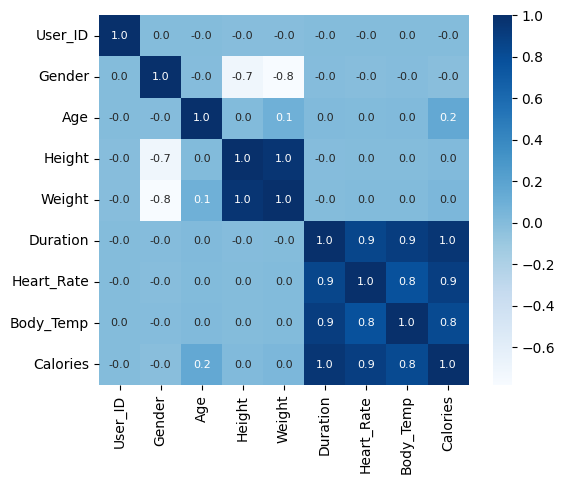

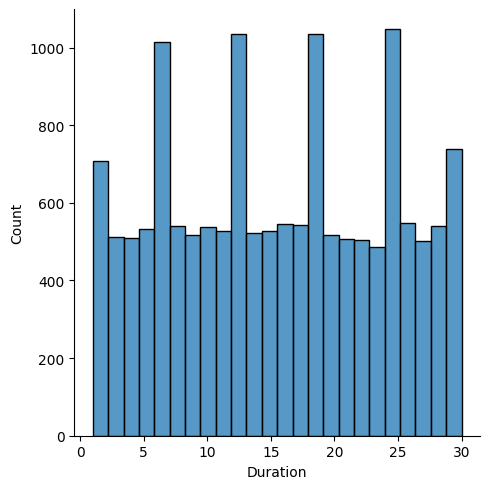

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# loading datasets
caloriesData = pd.read_csv('calories.csv')
factorsData = pd.read_csv('exercise.csv')

# merging datasets
netData = pd.merge(factorsData, caloriesData, on='User_ID')

# preprocessing data
pd.set_option('future.no_silent_downcasting', True)
netData['Gender'] = netData['Gender'].replace({'male': 0, 'female': 1})
netData['Gender'] = netData['Gender'].astype(int)

# displaying first few rows of data
print(netData.head())

# define features and target variable
X = netData.drop(columns=['User_ID', 'Calories'])
Y = netData['Calories']

# plotting correlations
correlation = netData.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# making distribution plot for duration
sns.displot(netData, x='Duration')

# splitting data into training and testing sets
trainingX, testX, trainingY, testY = train_test_split(X, Y, test_size=0.15, random_state=2)

# training model
trainingModel = XGBRegressor()
trainingModel.fit(trainingX, trainingY)

# making predictions
testDataOutput = trainingModel.predict(testX)
print(testDataOutput)

# calculating error
error = metrics.mean_absolute_error(testY, testDataOutput)
print(f"Mean Absolute Error: {error}")
